# EMPLOYEE ATTRITION CONTROL

### CASE STUDY
The project is to help a company which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee;
-Satisfaction Level
-Last evaluation
-Number of projects
-Average monthly hours
-Time spent at the company
-Whether they have had a work accident
-Whether they have had a promotion in the last 5 years
-Departments (column sales)
-Salary

Use your analytics skills to answer the following questions :
1. What type of employees are leaving?
2. Which employees are prone to leave next.
3. Recommendations

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import statistics



In [2]:
Existing_Employee = pd.read_csv("Existing employees.csv")
EL= pd.read_csv("Employees who left.csv")


In [3]:
Existing_Employee.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [4]:
EL.head(5)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


#### Data Preprocessing
#### This details entails preparation for the data analysis

SALARY COUNT OF EMPLOYEES WHO LEFT AND EXISTING EMPLOYEES

In [6]:
EL.salary.value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [7]:
Existing_Employee.salary.value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

WORK ACCIDENT COUNT FOR BOTH EMPLOYEES WHO LEFT AND EXISTING


In [5]:
EL['Work_accident'] = EL.Work_accident.replace(to_replace =1, 
                 value ="Yes") 
EL['Work_accident'] = EL.Work_accident.replace(to_replace =0, 
                 value ="No")
EL.Work_accident.value_counts()

No     3402
Yes     169
Name: Work_accident, dtype: int64

In [6]:
Existing_Employee['Working_accident'] = Existing_Employee.Work_accident.replace(to_replace =1,
                                  value = 'Yes')
Existing_Employee['Working_accident'] = Existing_Employee.Work_accident.replace(to_replace =0,
                                   value = 'No')
Existing_Employee.Work_accident.value_counts() 

0    9428
1    2000
Name: Work_accident, dtype: int64

PROMOTION COUNT FOR THE LAST 5YEARS FOR BOTH EMPLOYEES WHO LEFT AND EXISTING

In [7]:
EL['promotion_last_5years'] = EL.promotion_last_5years.replace(to_replace =1, 
                 value ="Yes") 
EL['promotion_last_5years'] = EL.promotion_last_5years.replace(to_replace =0, 
                 value ="No")
EL.promotion_last_5years.value_counts()

No     3552
Yes      19
Name: promotion_last_5years, dtype: int64

In [8]:
Existing_Employee['promotion_last_5years'] = Existing_Employee.promotion_last_5years.replace(to_replace =1,
                                  value = 'Yes')
Existing_Employee['promotion_last_5years'] = Existing_Employee.promotion_last_5years.replace(to_replace =0,
                                   value = 'No')
Existing_Employee.promotion_last_5years.value_counts()

No     11128
Yes      300
Name: promotion_last_5years, dtype: int64


UNIVARIATE ANALYSIS FOR BOTH EMPLOYEES WHO LEFT AND EXISTING EMPLOYEES

Salary Plot

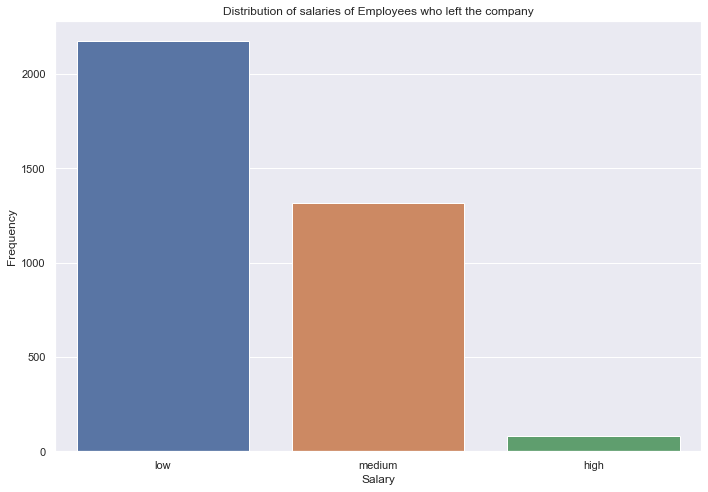

In [13]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.countplot(EL['salary'])
plt.title('Distribution of salaries of Employees who left the company')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('b.jpg')

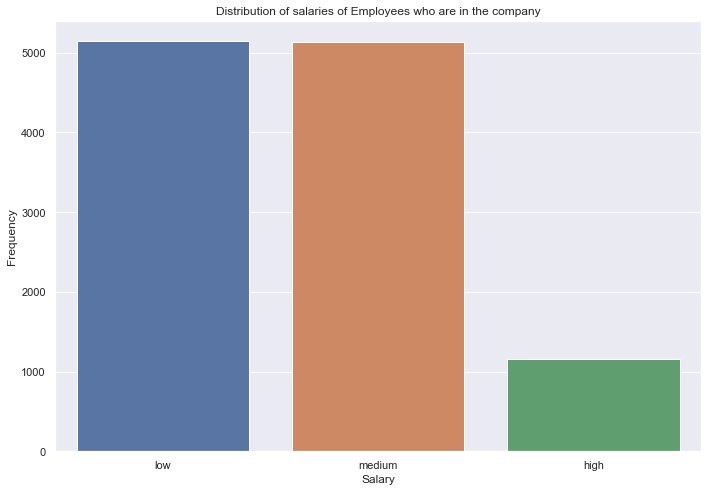

In [12]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.countplot(Existing_Employee['salary'])
plt.title('Distribution of salaries of Employees who are in the company')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('A.jpg')

Department Bar Plot

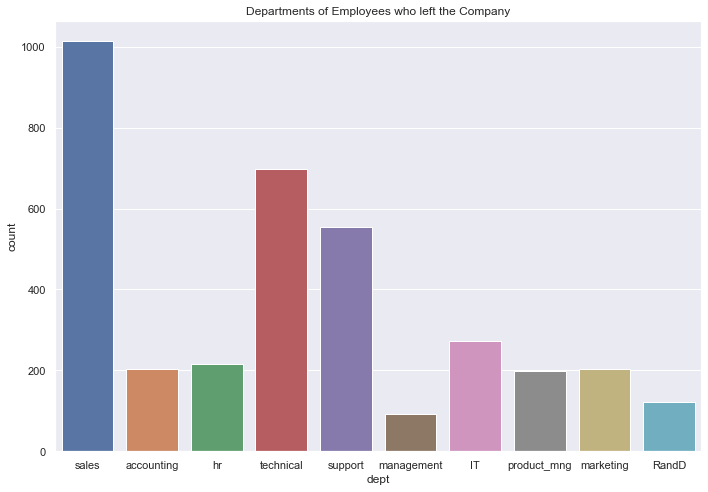

In [16]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.countplot(EL['dept'])
plt.title('Departments of Employees who left the Company')
plt.tight_layout()


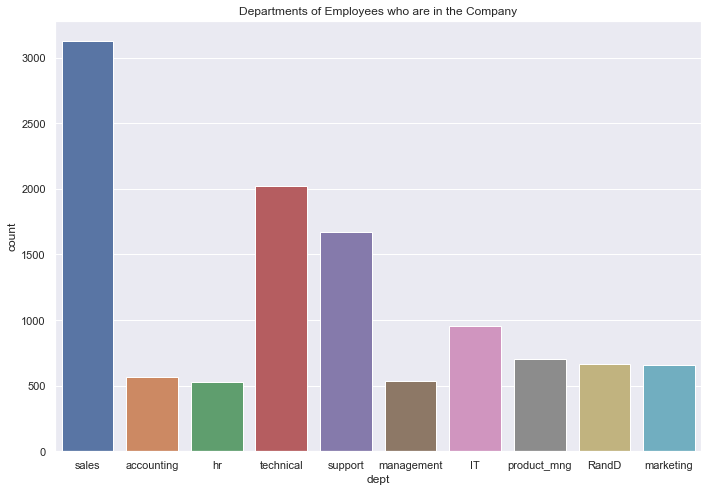

In [19]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.countplot(Existing_Employee['dept'])
plt.title('Departments of Employees who are in the Company')
plt.tight_layout()


Satisfaction Level

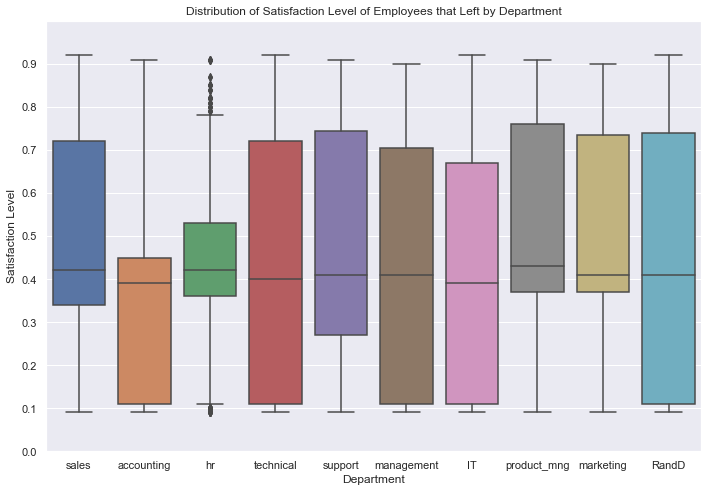

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(x='dept',y='satisfaction_level',data=EL)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.1))
plt.tight_layout()
plt.title("Distribution of Satisfaction Level of Employees that Left by Department")
plt.xlabel('Department')
plt.ylabel("Satisfaction Level")
plt.tight_layout()

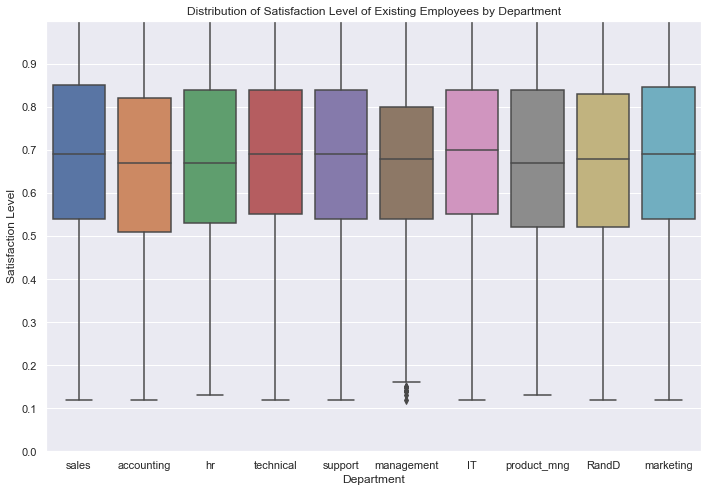

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(x='dept',y='satisfaction_level',data=Existing_Employee)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.1))
plt.tight_layout()
plt.title("Distribution of Satisfaction Level of Existing Employees by Department")
plt.xlabel('Department')
plt.ylabel("Satisfaction Level")
plt.tight_layout()

From the box plot of both Existing employees and employees who left the company, the following insights have been discovered 

1.   The mean satisfaction level of employees who left the company ranges bewteen 40-50% 
2.   The mean satisfaction level of existing employees in  the company ranges between 60-70%

Performing further analysis on the satisfaction level of both employees who left and existing employees in the company for better insight 


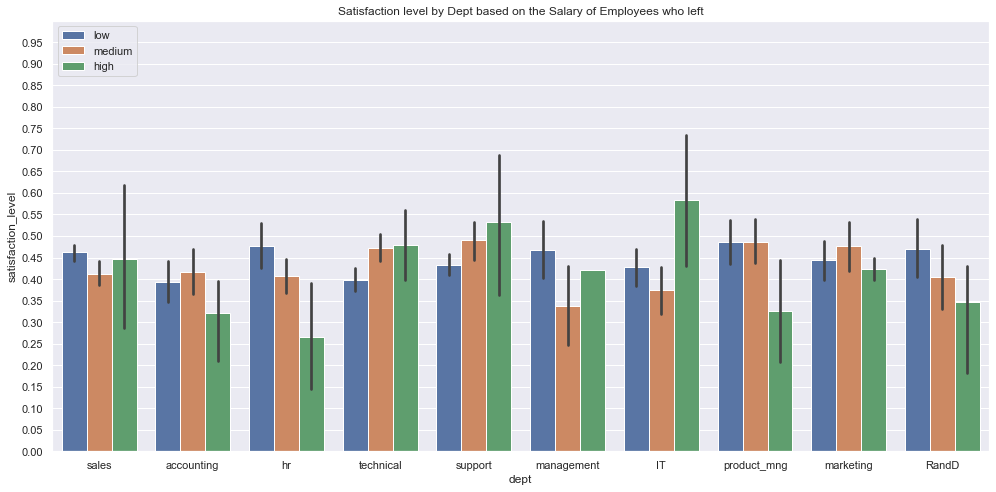

In [24]:
plt.figure(figsize=(14,7))
sns.set(style='darkgrid')
sns.barplot(x='dept', y='satisfaction_level', hue='salary', data = EL)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title('Satisfaction level by Dept based on the Salary of Employees who left')
plt.tight_layout()
plt.legend(loc=2)

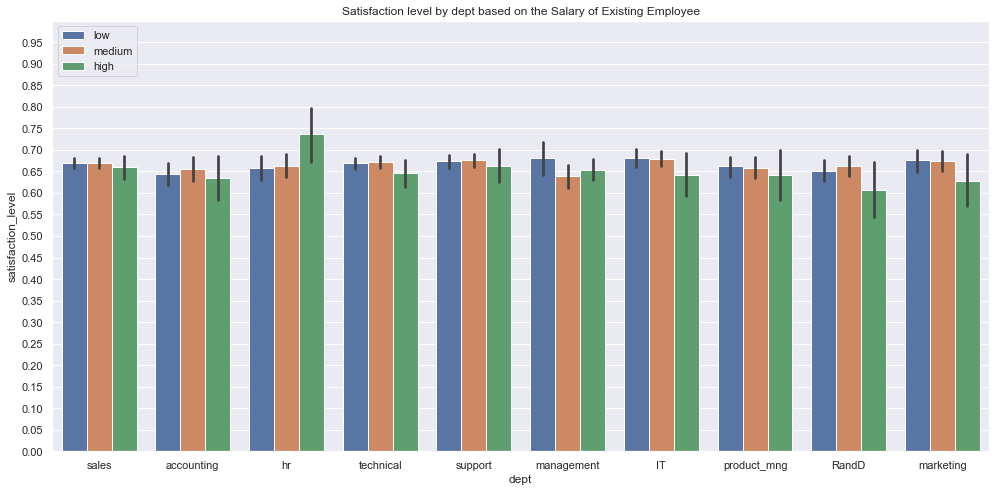

In [25]:
plt.figure(figsize=(14,7))
sns.set(style='darkgrid')
sns.barplot(x='dept',y='satisfaction_level',hue='salary',data= Existing_Employee)
plt.title('Satisfaction level by dept based on the Salary of Existing Employee')
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

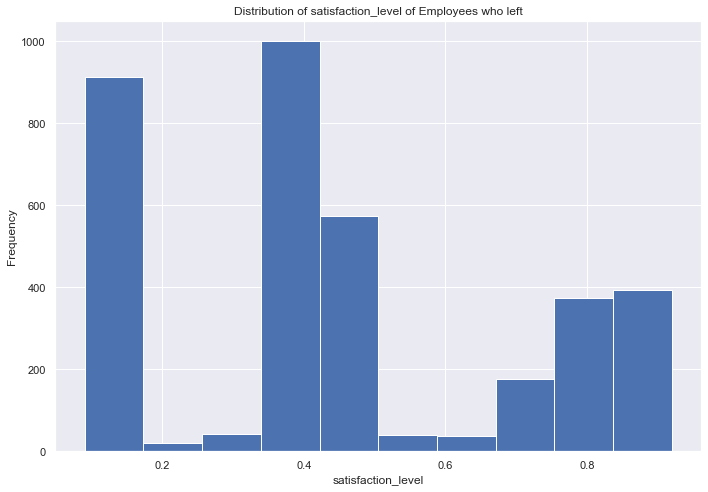

In [15]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
plt.hist(EL['satisfaction_level'])
plt.title('Distribution of satisfaction_level of Employees who left')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('b1.jpg')

In [27]:
EL['satisfaction_level2'] = pd.cut(EL['satisfaction_level'], 
       3, labels=["small", "medium", "high"])

In [28]:
EL.satisfaction_level2.value_counts()

medium    1536
small     1078
high       957
Name: satisfaction_level2, dtype: int64

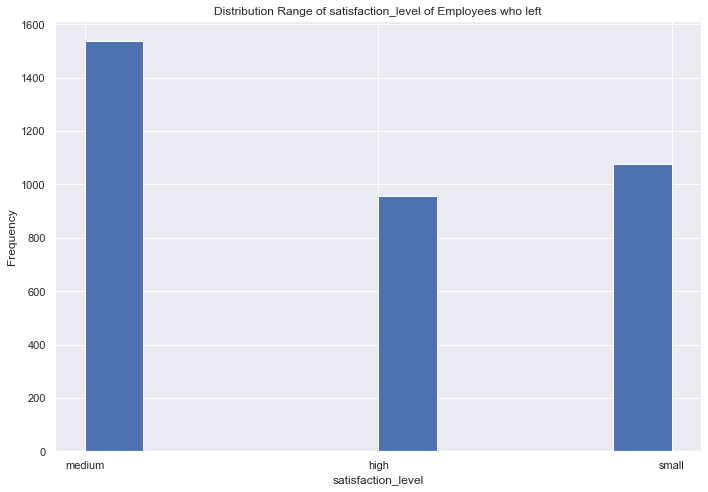

In [29]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
plt.hist(EL['satisfaction_level2'])
plt.title('Distribution Range of satisfaction_level of Employees who left')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.tight_layout()

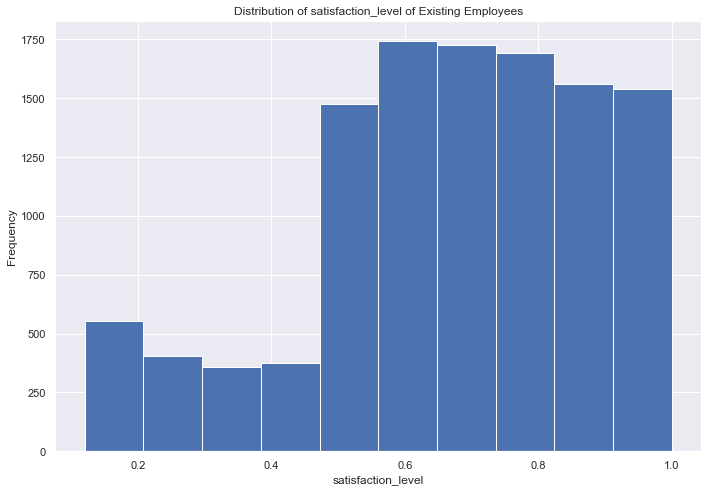

In [14]:

plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
plt.hist(Existing_Employee['satisfaction_level'])
plt.title('Distribution of satisfaction_level of Existing Employees')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('a1.jpg')

In [31]:
Existing_Employee['satisfaction_level2'] = pd.cut(Existing_Employee['satisfaction_level'], 
       3, labels=["small", "medium", "high"])

In [32]:
Existing_Employee.satisfaction_level2.value_counts()

high      5365
medium    4635
small     1428
Name: satisfaction_level2, dtype: int64

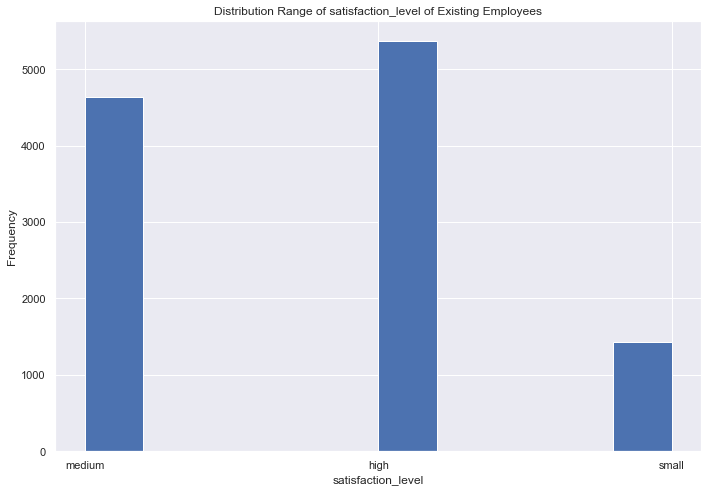

In [33]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
plt.hist(Existing_Employee['satisfaction_level2'])
plt.title('Distribution Range of satisfaction_level of Existing Employees')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.tight_layout()

From the satisfaction level chart plots of employees who left the company, it is observed that the satisfaction level is below average, therefore it is vital to show the percentage of employees who left that are in this category 

DETERMINING THE PERCENTAGE OF EMPLOYEES WHO LEFT THE COMPANY HAD A SATISFACTION LEVEL BELOW AVERAGE OF 45

In [35]:
(len(EL[EL['satisfaction_level']<0.45])/len(EL)) * 100

64.57574908989079

From the output generated it can be observed that an estimate of 65% of employees who left had a satisfaction level below average of 45%.
This needs to be looked into as it's a determining factor as to why employees left the company.
Futher insights needs to be carried out as to why the satisfaction level is low.
Promotion status, salary where two factors that was considered by intuition which prompted further analysis to determine the percenatge of employees who left having a satisfaction level of 45%, their promotion status and salary range

In [36]:
(EL[EL['satisfaction_level']<0.45] ['salary'].value_counts(normalize=True))*100

low       60.754553
medium    37.120555
high       2.124892
Name: salary, dtype: float64

From the output displayed, it can be seen that an estimate of 61% of employees who left where low income earners, 37% where medium income earners and 2% where high income earners.

In [37]:
(EL[EL['satisfaction_level']<0.45] ['promotion_last_5years'].value_counts(normalize=True))*100

No     99.566349
Yes     0.433651
Name: promotion_last_5years, dtype: float64

From the output displayed, it can be seen that 99.6% of employees who left had a satisfaction level less than 45% and where not promoted in the last five years

Through the insights gained from the employees who left, it is vital to validate the position of the existing employees in the company.

DETERMINING THE MEAN SATISFACTION LEVEL OF EXISTING EMPLOYEES

In [39]:
Existing_Employee['satisfaction_level'].mean()*100

66.6809590479516

From the output we see that the average satisfaction level of those existing is around `67%`. Hence, using the metrics of employee that left as an insights to checkmate existing employees who are prone to leave considering their status

In [40]:
print (str((len(Existing_Employee[Existing_Employee['satisfaction_level']<0.45])/len(Existing_Employee)) * 100) + '%' + ' of employees that exist have satisfaction level less than 45%')

13.816940847042353% of employees that exist have satisfaction level less than 45%


In [41]:
Existing_Employee[Existing_Employee['satisfaction_level']<0.45]['promotion_last_5years'].value_counts(normalize=True)*100

No     97.720076
Yes     2.279924
Name: promotion_last_5years, dtype: float64

From the `13%` of employees with less than 45% satisfaction level, we see that about `98%` has experienced no promotion in the last 5 years'

#### Last Evaluation

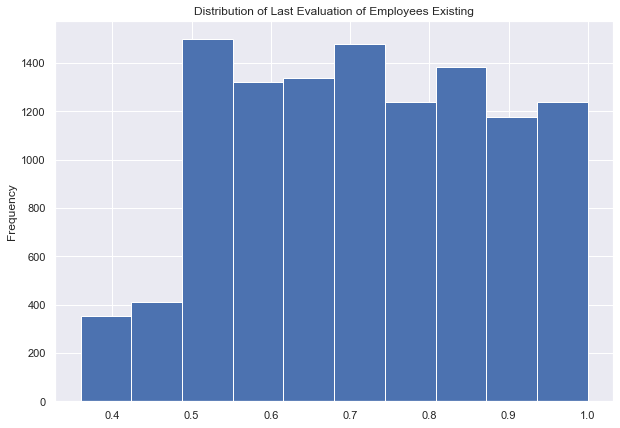

In [44]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Last Evaluation of Employees Existing")
Existing_Employee['last_evaluation'].plot.hist()

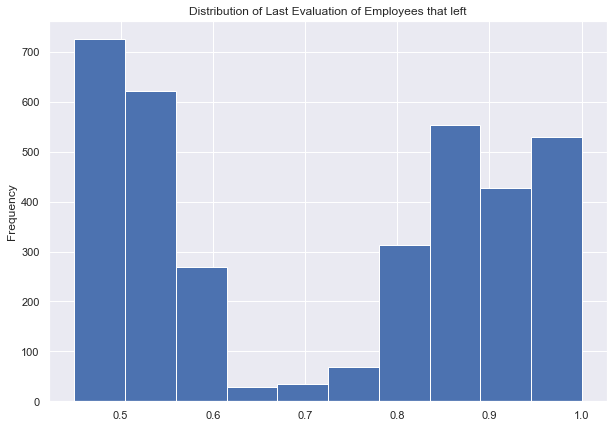

In [45]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Last Evaluation of Employees that left")
EL['last_evaluation'].plot.hist()

From the above plots further analysis is needed to get insights

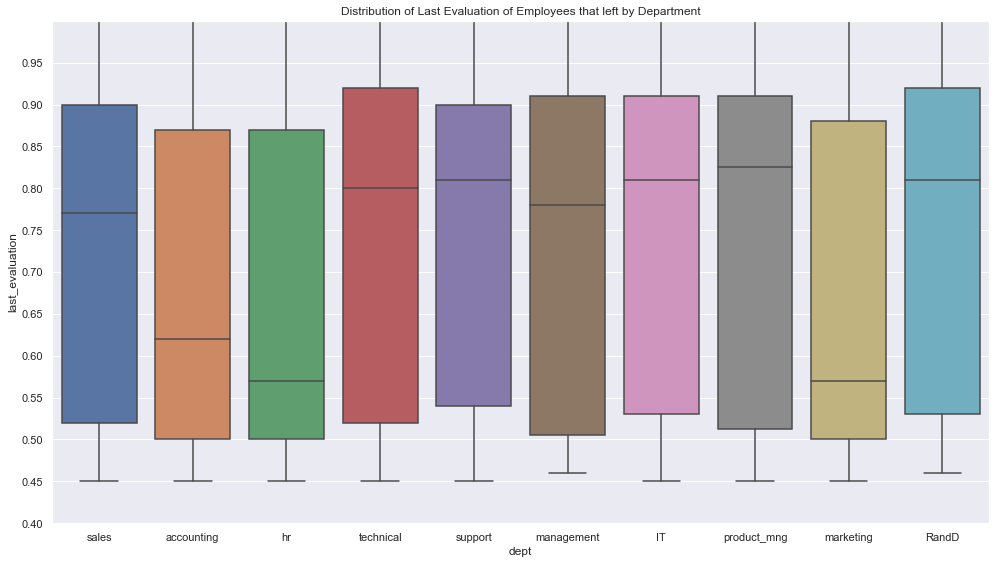

In [47]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='last_evaluation',data=EL)
plt.title("Distribution of Last Evaluation of Employees that left by Department")
plt.ylim([0.4,1])
plt.yticks(np.arange(0.4, 1, step=0.05))
plt.tight_layout()

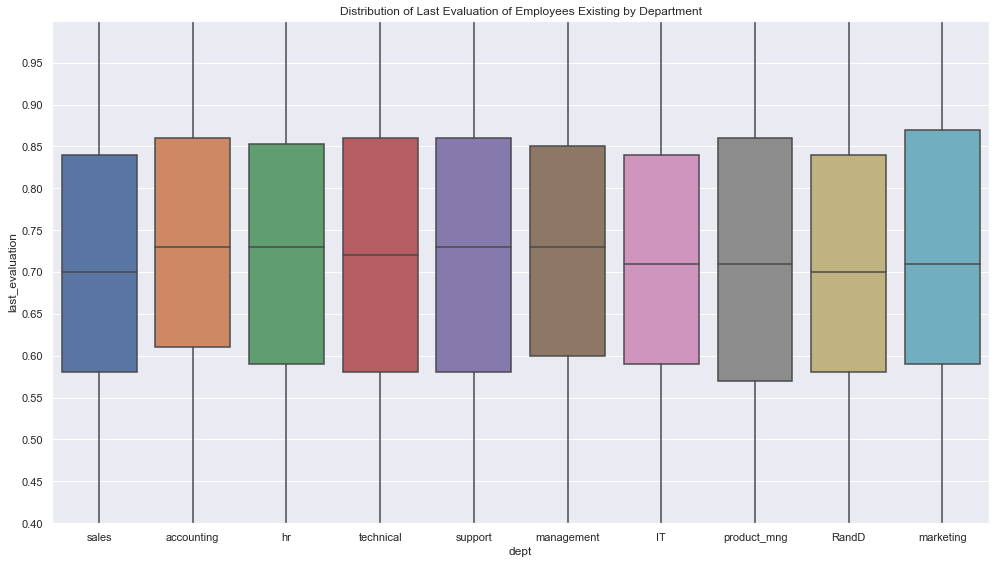

In [48]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='last_evaluation',data=Existing_Employee)
plt.title("Distribution of Last Evaluation of Employees Existing by Department")
plt.ylim([0.4,1])
plt.yticks(np.arange(0.4, 1, step=0.05))
plt.tight_layout()

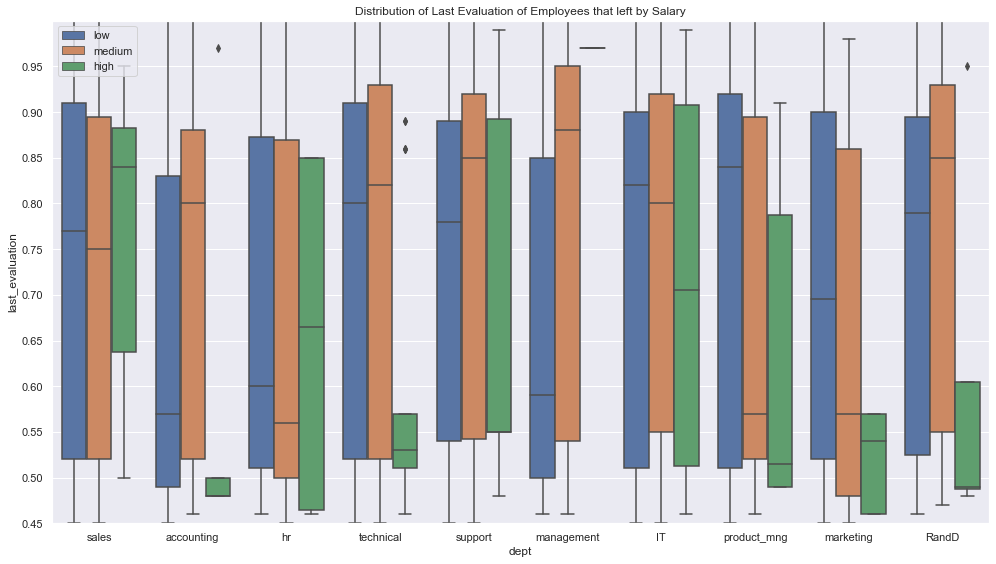

In [50]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='last_evaluation',hue='salary',data=EL)
plt.title("Distribution of Last Evaluation of Employees that left by Salary")
plt.ylim([0.45,1])
plt.yticks(np.arange(0.45, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

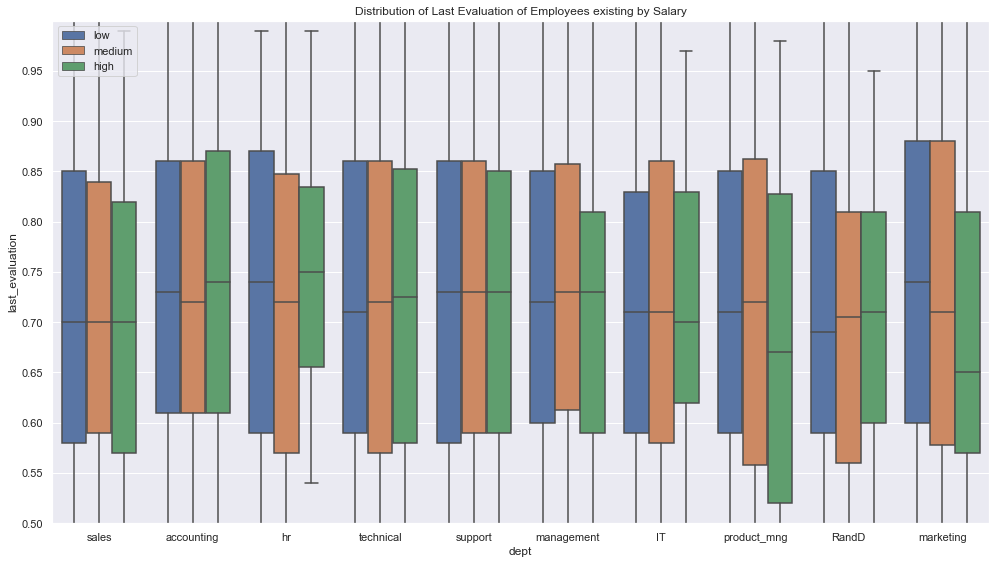

In [51]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='last_evaluation',hue='salary',data=Existing_Employee)
plt.title("Distribution of Last Evaluation of Employees existing by Salary")
plt.ylim([0.5,1])
plt.yticks(np.arange(0.5, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

### BI/MULTIVARIATE ANALYSIS

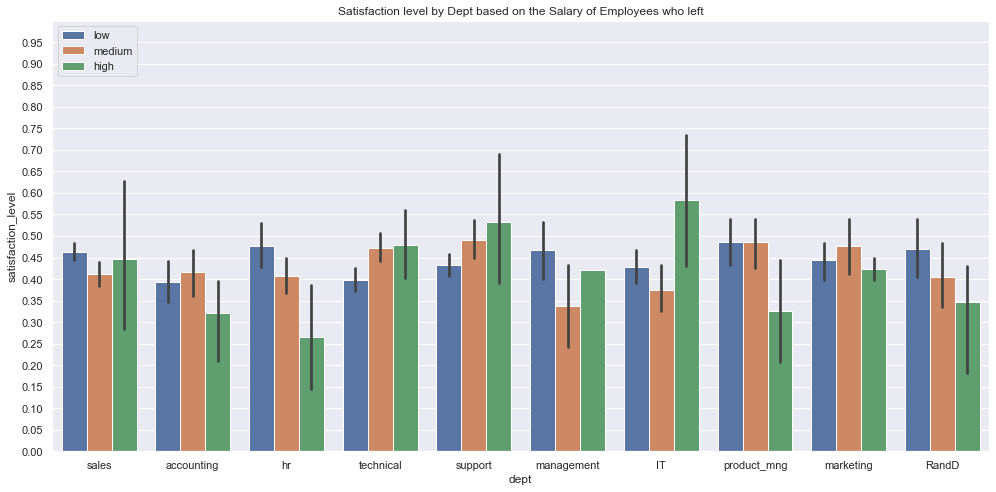

In [23]:
plt.figure(figsize=(14,7))
sns.set(style='darkgrid')
sns.barplot(x='dept', y='satisfaction_level', hue='salary', data = EL)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title('Satisfaction level by Dept based on the Salary of Employees who left')
plt.tight_layout()
plt.legend(loc=2)
plt.savefig('left.jpg')

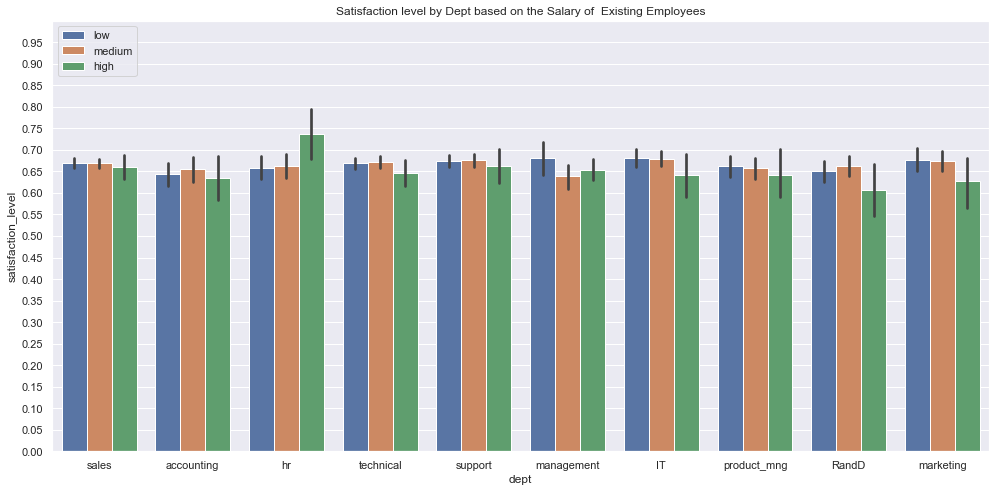

In [24]:
plt.figure(figsize=(14,7))
sns.set(style='darkgrid')
sns.barplot(x='dept', y='satisfaction_level', hue='salary', data = Existing_Employee)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title('Satisfaction level by Dept based on the Salary of  Existing Employees')
plt.tight_layout()
plt.legend(loc=2)
plt.savefig('exist.jpg')

Text(0, 0.5, 'Satisfaction Level')

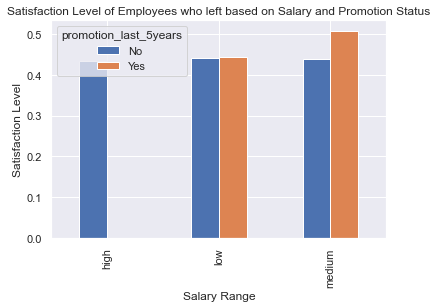

In [54]:
EL_PRO =EL.pivot_table(index='salary',columns='promotion_last_5years',values='satisfaction_level')
EL_PRO.plot.bar()
plt.title("Satisfaction Level of Employees who left based on Salary and Promotion Status")
plt.xlabel("Salary Range")
plt.ylabel("Satisfaction Level")

Insight: Most employees who left with a high salary range weren't promoted,regardless of other employee who were promoted that had their salary range from low to medium, it futher can be seen that the satisfaction level was below average of 45% and the employees who left where not promoted irrespective of their salary income. 
Hence Satisfaction level and promotion status are determining factors as to why employees are leaving the company.

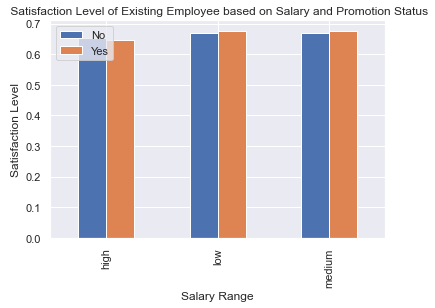

In [55]:
Existing_Employee_PRO =Existing_Employee.pivot_table(index='salary',columns='promotion_last_5years',values='satisfaction_level')
Existing_Employee_PRO.plot.bar()
plt.title(" Satisfaction Level of Existing Employee based on Salary and Promotion Status")
plt.xlabel("Salary Range")
plt.ylabel("Satisfaction Level")
plt.legend(loc=2)

From output above the insight: Time Spent and promotion status are great factors that determine if an employee should leave or not, some employee who left that spent 6 years in the company weren't promoted, even though their satisfaction level was quite moderate.
It can also be seen that An avaerge employee who left spent about 4 years with 0.45 satisfaction level and wasn't promoted. 

 

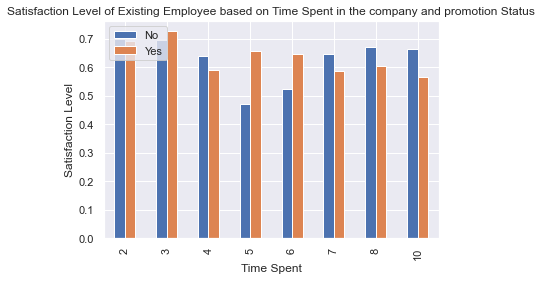

In [56]:
Existing_Employee_PRO =Existing_Employee.pivot_table(index='time_spend_company',columns='promotion_last_5years',values='satisfaction_level')
Existing_Employee_PRO.plot.bar()
plt.title("Satisfaction Level of Existing Employee based on Time Spent in the company and promotion Status")
plt.xlabel("Time Spent")
plt.ylabel("Satisfaction Level")
plt.legend(loc=2)

From the output the insight obtained is such that the existing employees in company irrespective of the time spent have a moderate satisfaction level and positive promotion  status above 0.5 exculding employeees that spent between 5 years in the company.
Hence satisfaction level of employees that spent 5 years should is considered as a determining factor and why such employees are prone to leave.

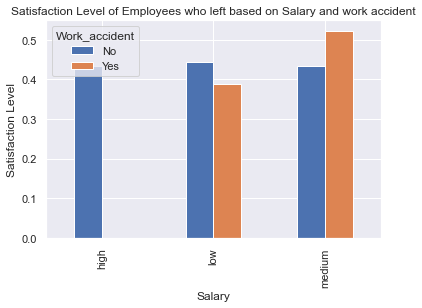

In [21]:
EL_PRO =EL.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
EL_PRO.plot.bar()
plt.title("Satisfaction Level of Employees who left based on Salary and work accident")
plt.xlabel("Salary")
plt.ylabel("Satisfaction Level")
plt.savefig('a2.jpg')

From the output the insight obtained is such that employees who left that earn between low and medium salaries where affected by work accidents and their satisfaction level was below avaerage of 0.45 as compared to those with a high salary.
Hence work accident and satisfaction level are reasons as to why employees are leaving the company.

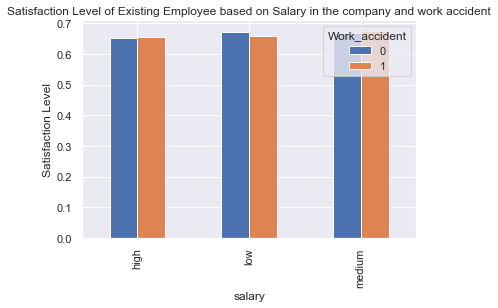

In [19]:
Existing_Employee_PRO =Existing_Employee.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
Existing_Employee_PRO.plot.bar()
plt.title("Satisfaction Level of Existing Employee based on Salary in the company and work accident")
plt.xlabel("salary")
plt.ylabel("Satisfaction Level")
plt.savefig('b2.jpg')

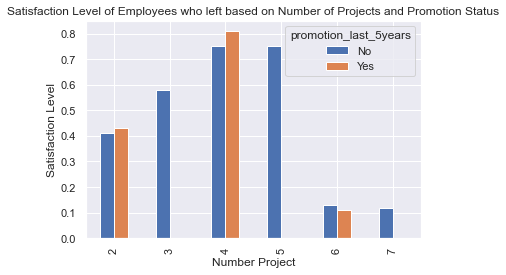

In [20]:
EL_PRO =EL.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
EL_PRO.plot.bar()
plt.title("Satisfaction Level of Employees who left based on Number of Projects and Promotion Status")
plt.xlabel("Number Project")
plt.ylabel("Satisfaction Level")
plt.savefig('a3.jpg')

From the output displayed, the insight gotten it can be seen that as the number of projects embarked on by employees who left exceeded 4, the satisfaction level began to decline and they where not promoted in the last five years.
Hence an increase in the number of projects resulting in a decline in satisfaction level and employee promotion status can be seen as reasons as to why employees are leaving the company.

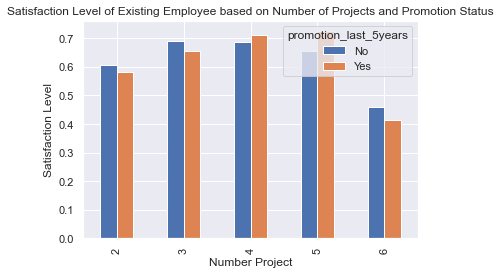

In [26]:
Existing_Employee_PRO =Existing_Employee.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
Existing_Employee_PRO.plot.bar()
plt.title("Satisfaction Level of Existing Employee based on Number of Projects and Promotion Status")
plt.xlabel("Number Project")
plt.ylabel("Satisfaction Level")
plt.savefig('b3.jpg')

From the output displayed, the insight gotten it can be seen that as the number of projects embarked on by employees still in the company exceeded 4, the satisfaction level began to decline and they where not promoted in the last five years, this can also be seen as a trend for employees who left.
Hence an increase in the number of projects resulting in a decline in satisfaction level and employee promotion status can be seen as reasons as to which exsiting employees are prone to leave the company.

In [62]:
from sklearn.cluster import KMeans
# Filter data
EL_emp =  EL[['satisfaction_level', 'last_evaluation']]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(EL_emp)

In [64]:
import warnings
warnings.filterwarnings("ignore")

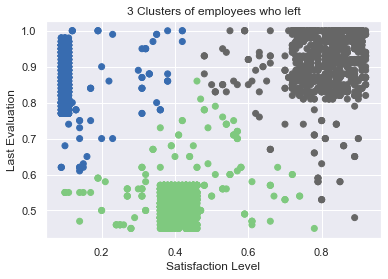

In [65]:
EL_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(EL_emp['satisfaction_level'], EL_emp['last_evaluation'], c=EL_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

High Satisfaction and High Evaluation(Shaded by grey color in the graph), you can also call them Winners.
Low Satisfaction and High Evaluation(Shaded by blue color in the graph), you can also call them Frustrated.
Moderate Satisfaction and moderate Evaluation (Shaded by green color in the graph), you can also call them 'Bad match'.

In [72]:
EL.columns
Existing_Employee.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary', 'Working_accident',
       'satisfaction_level2'],
      dtype='object')

From the output displayed above, the following can be deduced

1. As the number of project taken by employees who left was greater than 4, the satisfaction level begins to drop which can also be seen as a trend for the current employees. Hence, as a suggestion to further maintain a high satisfaction level of employees, the company should ensure the number of projects allocated to an employee is not too overwhelming thereby losing enthusiasm which may result to seeing a need to leave

2. The salary structure of those that left who had work accident was within the Low and medium range which when analyzed from satisfaction level point their satisfaction level was approximately 50%. However,  checking this information with those still in the company it was discovered that their salary was distributed into low, medium and high range which further improved satisfaction level.  This let us see that the company maintained a good salary structure for those that had work accidents. 
